# Cargar datos

In [3]:
import pandas as pd
import numpy as np
import json

#usamos la funcion que nos dan
def build_dataset():
    data = [json.loads(x) for x in open("MLA_100k.jsonlines")]
    target = lambda x: x.get("condition")
    N = -10000
    X_train = data[:N]
    X_test = data[N:]
    y_train = [target(x) for x in X_train]
    y_test = [target(x) for x in X_test]
    for x in X_test:
        del x["condition"]
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = build_dataset()

Para ver los datos más facilmente los pasamos a un dataframe

In [4]:
tabla_train=pd.DataFrame.from_dict(X_train, orient='columns') #las keys son las columnas

tabla_test=pd.DataFrame.from_dict(X_test, orient='columns') #las keys son las columnas

In [5]:
tabla_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seller_address                    90000 non-null  object 
 1   warranty                          35243 non-null  object 
 2   sub_status                        90000 non-null  object 
 3   condition                         90000 non-null  object 
 4   seller_contact                    1982 non-null   object 
 5   deal_ids                          90000 non-null  object 
 6   base_price                        90000 non-null  float64
 7   shipping                          90000 non-null  object 
 8   non_mercado_pago_payment_methods  90000 non-null  object 
 9   seller_id                         90000 non-null  int64  
 10  variations                        90000 non-null  object 
 11  location                          90000 non-null  object 
 12  site

In [6]:
tabla_train.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,None,1,2015-09-05T20:42:53.000Z,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,None,1,2015-09-26T18:08:30.000Z,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,None,1,2015-09-09T23:57:07.000Z,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,None,1,2015-09-28T18:47:56.000Z,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,None,1,2015-08-24T22:07:20.000Z,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


No es muy fácil de leer y tiene muchas columnas, algunas de ellas con muchos valroes faltantes, otras con diccionarios (a priori los ignoramos). Vemos la primer fila más en detalle para entender qué hay en la tabla, queremos encontrar features para nuestro problema.

In [7]:
ej=X_train[0]
for pair in ej.items():
    print(pair[0])
    print(pair[1],'\n')

seller_address
{'comment': '', 'longitude': -58.3986709, 'id': 78162842, 'country': {'name': 'Argentina', 'id': 'AR'}, 'address_line': '', 'latitude': -34.6280698, 'search_location': {'neighborhood': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'TUxBUENBUGw3M2E1'}, 'city': {'name': 'Capital Federal', 'id': 'TUxBQ0NBUGZlZG1sYQ'}}, 'zip_code': '', 'city': {'name': 'San Cristóbal', 'id': 'TUxBQlNBTjkwNTZa'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}} 

warranty
None 

sub_status
[] 

condition
new 

seller_contact
None 

deal_ids
[] 

base_price
80 

shipping
{'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'not_specified', 'dimensions': None} 

non_mercado_pago_payment_methods
[{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Acordar con el comprador', 'id': 'MLAWC', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}] 

seller_id
74952096

Hay razones por las que algunas variables de las que vimos acá pueden ser buenos predictores (son solo intuiciones en esta etapa).

`title` : hay palabras clave como "original", "sin uso", "usado", "con uso". Además de otros patrones en general.

`seller_id` : los vendedores venden o bien productos usados o bien nuevos (en su mayoría)

`category_id` : categorías en las que predominan artículos de un tipo u de otro (libros usados pero ropa interior nueva)

`price` : podrían haber patrones en el precio

`initial_quantity`: la cantidad de productos inicial al crear la publicacion, la idea es que la gente que vende cosas usadas no tiene 10 remeras usadas (numeros altos corresponden con locales que venden cosas nuevas en general)

`sold_quantity`: parecido a lo anterior, los locales son los que tienden a vender más y en general venden cosas nuevas

`listing_type_id`: el tipo de vendedor, si paga por ser premium o algo asi o es uno de esos super vendedores gold, entonces puede ser un local que venda cosas nuevas tambien.

In [8]:
#investigamos un poco los valores en este loop
for dic in X_train[0:100]:
    print('title -----> ',dic['title'])
    
    print('seller_id -----> ',dic['seller_id'])
    
    print('category_id -----> ',dic['category_id'])
    
    print('price -----> ',dic['price'])    
    
    print('initial_quantity -----> ',dic['initial_quantity'])
    
    print('sold_quantity -----> ',dic['sold_quantity'])
    
    print('listing_type_id -----> ',dic['listing_type_id'])
    
    print('condition -----> ',dic['condition'],'\n')

title ----->  Auriculares Samsung Originales Manos Libres Cable Usb Oferta
seller_id ----->  74952096
category_id ----->  MLA126406
price ----->  80
initial_quantity ----->  1
sold_quantity ----->  0
listing_type_id ----->  bronze
condition ----->  new 

title ----->  Cuchillo Daga Acero Carbón Casco Yelmo Solingen Con Vaina
seller_id ----->  42093335
category_id ----->  MLA10267
price ----->  2650
initial_quantity ----->  1
sold_quantity ----->  0
listing_type_id ----->  silver
condition ----->  used 

title ----->  Antigua Revista Billiken, N° 1826, Año 1954
seller_id ----->  133384258
category_id ----->  MLA1227
price ----->  60
initial_quantity ----->  1
sold_quantity ----->  0
listing_type_id ----->  bronze
condition ----->  used 

title ----->  Alarma Guardtex Gx412 Seguridad Para El Automotor!!!
seller_id ----->  143001605
category_id ----->  MLA86345
price ----->  580
initial_quantity ----->  1
sold_quantity ----->  0
listing_type_id ----->  silver
condition ----->  new 

title

In [9]:
#nota: price o base_price?
#solamente hay unos pocos productos que tienen un price y base_price distintos, nos quedamos con price
tabla_train.loc[tabla_train['base_price']!=tabla_train['price'],['title','base_price','price']]

,title,base_price,price
1822,Star Wars Subasta !!! Han Solo Hasbro,1.0,41.0
2498,"Lampara Tambor, Pantalla Colgante 35cm Con Tapa",1.0,52.0
2654,Flip Cover Samsung Galaxy Core 2 Color Negro,1.0,11.0
7949,Lote De Dos Celulares Para Repuesto,10.0,16.0
15082,"Molde De Silicona Para Tortas, Flanes, Postres...",1.0,8.5
19702,"Antiguos Clasicos, Space Filler Y Reimpr Oport...",1.0,27.0
23808,Cuna Cama Funcional De El Corral +colchon Y Ca...,1.0,785.0
31065,"Discos Rigidos 1tb Wd Nuevos Con Garantia, Ofe...",1.0,565.0
37294,Excelente Silla Americana Satinado Negro Tapiz...,1.0,48.0
37323,Para Mamá Día De Campo En Campo Brandsen,155.0,175.0


# Exploración de las features mencionadas

## category_id

Agrupamos segun categoria y luego tambien por condition (si el producto es nuevo y usado). contamos en cada caso
la cantidad de filas

In [10]:
#necesitamos una columna para instnciar los grupos, elegimos seller_address arbitrariamente
cantidades_abs=pd.DataFrame(tabla_train.groupby('category_id')['seller_address'].size())
cuenta=pd.DataFrame(tabla_train.groupby(['category_id','condition'])['seller_address'].size())

Queremos ordenar las filas por categoria y ver si en las categorias predomina normlamente una condition o no. Para ordenar es que usamos las cantidades de productos por categoria (ya que esto nos agrupa las categorias entre si).

Mergeamos y ordenamos (todo esto es para poder usar el sort_values bien)

In [11]:
mergeada=pd.merge(left=cuenta.reset_index(),right=cantidades_abs,how='inner',on='category_id',)
vista=mergeada.sort_values(by=['seller_address_y','category_id','condition'],ascending=[False,False,True]).set_index('category_id')

In [12]:
#pd.set_option('max_rows',None), opcion para poder ver todas las filas en "vista" y explorar mejor

In [13]:
vista #ignorar los titulos de las columnas

,condition,seller_address_x,seller_address_y
category_id,,,
MLA1227,new,2039,4139
MLA1227,used,2100,4139
MLA2044,new,432,1759
MLA2044,used,1327,1759
MLA41287,new,110,829
...,...,...,...
MLA100038,used,1,1
MLA100036,used,1,1
MLA100032,new,1,1


In [14]:
# se comparte bien este dato con tabla_test?
en_test = len(set(tabla_test['category_id']))
comparte = len(set(tabla_train['category_id']).intersection(tabla_test['category_id']))

print(en_test,comparte)

3802 3386


## seller_id

Lo mismo que con las categorias

In [15]:
cantidades_abs=pd.DataFrame(tabla_train.groupby('seller_id')['seller_address'].size())
cuenta=pd.DataFrame(tabla_train.groupby(['seller_id','condition'])['seller_address'].size())

mergeada=pd.merge(left=cuenta.reset_index(),right=cantidades_abs,how='inner',on='seller_id',)
vista=mergeada.sort_values(by=['seller_address_y','seller_id','condition'],ascending=[False,False,True]).set_index('seller_id')

In [16]:
vista

,condition,seller_address_x,seller_address_y
seller_id,,,
52340590,new,795,850
52340590,used,55,850
35235505,new,654,654
76310627,new,424,424
7125093,new,2,408
...,...,...,...
61975,used,1,1
36088,used,1,1
31189,used,1,1


## price

Queremos ver si los precios nos dicen algo sobre la condition

In [17]:
import seaborn as sns

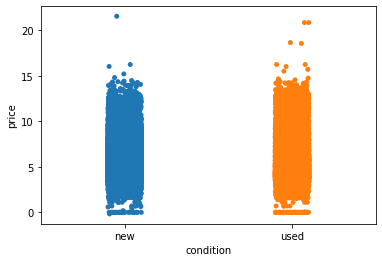

In [29]:
ax = sns.stripplot(x=tabla_train.condition, y=np.log(tabla_train.price))

<AxesSubplot:xlabel='condition', ylabel='price'>

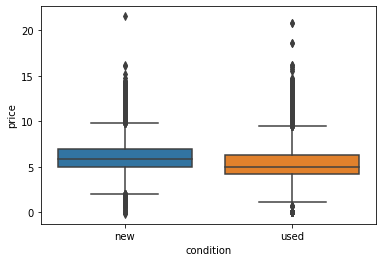

In [28]:
sns.boxplot(x=tabla_train.condition, y=np.log(tabla_train.price))
# los articulos nuevos son mas caros en la media pero por muy poquito
# no parece ser un buen criterio, no por si solo

# intial_quantity, sold_quantitiy y listing_type_id

Distinguimos por nuevo y usado y tiramos un value_counts para cada variable

## sold_quantity

### dentro de los productos usados

In [20]:
tabla_train.loc[tabla_train['condition']=='used','sold_quantity'].value_counts() # la GRAN mayoria tiene pocos elementos vendidos

0      39971
1       1298
2        201
3         65
4         30
5         22
6          9
8          8
9          7
14         6
11         5
7          5
10         4
16         3
12         2
15         2
13         2
19         1
222        1
39         1
982        1
20         1
17         1
81         1
33         1
Name: sold_quantity, dtype: int64

In [21]:
tabla_train.loc[tabla_train['condition']=='used','initial_quantity'].value_counts() 
# casi todos tienen un solo articulo, la gran mayoria tiene pocos elementos vendidos

1      40297
2        549
3        193
4        104
10        99
       ...  
80         1
522        1
93         1
900        1
111        1
Name: initial_quantity, Length: 72, dtype: int64

In [22]:
tabla_train.loc[tabla_train['condition']=='used','listing_type_id'].value_counts()
# muchos free

bronze          21494
free            17832
silver           1620
gold_premium      349
gold              301
gold_special       52
Name: listing_type_id, dtype: int64

### dentro de los productos nuevos

In [23]:
tabla_train.loc[tabla_train['condition']=='new','sold_quantity'].value_counts() 
# tambien, la mayoria tiene pocos vendidos, no se diferencia tanto por este lado

0       34863
1        4626
2        2045
3        1131
4         823
        ...  
235         1
1116        1
852         1
530         1
298         1
Name: sold_quantity, Length: 303, dtype: int64

In [24]:
tabla_train.loc[tabla_train['condition']=='new','initial_quantity'].value_counts() 
# mas de la mitad tienen varios articulos, muy distinto al caso del "used"

1       22948
10       4116
2        4026
3        2911
5        2133
        ...  
1106        1
968         1
229         1
631         1
770         1
Name: initial_quantity, Length: 422, dtype: int64

In [25]:
tabla_train.loc[tabla_train['condition']=='new','listing_type_id'].value_counts() 
# hay pocos free, en la de usados habia muchos

bronze          35410
silver           6575
gold_special     2641
gold             1869
free             1428
gold_premium      416
gold_pro           13
Name: listing_type_id, dtype: int64

Las tres variables son prometedoras

# Conclusión

Nos quedamos con todas las que mencionamos menos `price`. No estudiamos `title` pero suponemos que va a ser útil.

Nota: después también voy a sacar |seller_id| porque no afecta el desempeño de los modelos (a veces hasta mejoró sacar esa feature) y además es muy especifica (no generaliza bien al contexto real, no dice nada acercad de clientes nuevos en la plataforma).